ФБ-22 Копилов Сергій

Лабораторна 3(Перший рівень)

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

print("setup complete")

setup complete


In [2]:
def download_first_part():

    url_download = 'https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip'
    file_name = 'individual+household+electric+power+consumption.zip'
    download_dir = 'first_part_files'
    os.makedirs(download_dir, exist_ok=True)

    file_path = os.path.join(download_dir, file_name)

    if not os.path.exists(file_path):
        try:
            with urllib.request.urlopen(url_download) as url:
                with open(file_path, 'wb') as f:
                    f.write(url.read())
            print(f" {file_name} успіх")
        except Exception as e:
            print(f" Помилка: {e}")
    else:
        print(f" {file_name} завантажений.")

    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(download_dir)
        extracted_files = zip_ref.namelist()

    print(f" Шлях до архіву: {os.path.abspath(download_dir)}")
    print(f" Файли, отримані з архіву:")
    for file in extracted_files:
        print(f"    - {file}")

download_first_part()

 individual+household+electric+power+consumption.zip завантажений.
 Шлях до архіву: c:\Users\user\Desktop\data_science\Lab_4\first_part_files
 Файли, отримані з архіву:
    - household_power_consumption.txt


In [3]:
def pandas_create():
    url = "first_part_files/household_power_consumption.txt"
    df = pd.read_csv(url, sep=";", low_memory=False, na_values=['?'])
    df.dropna(inplace=True)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    print("Pandas dataframe ready")

    return df

def numpy_create():
    url = "first_part_files/household_power_consumption.txt"
    np_arr = np.genfromtxt(url, delimiter=';', skip_header=1, dtype=str)
    mask = ~(np.any(np_arr == '?', axis=1))
    np_arr = np_arr[mask]
    float_data = np_arr[:,2:].astype(float)
    np_arr = np.hstack([np_arr[:, :2], float_data], dtype=object)
    print("Numpy array створений ready")

    return np_arr

In [4]:
import timeit
start_time = timeit.default_timer()
household_power = pandas_create()
end_time = timeit.default_timer()
pandas_creating_time = end_time -start_time

household_power.head()

Pandas dataframe ready


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [5]:
from timeit import timeit
def fp_first_task_df(arr):
    households_over_5kw = arr[arr['Global_active_power'] > 5]
    return households_over_5kw

first_task_df = fp_first_task_df(household_power)
time_first_task_df = timeit(lambda: fp_first_task_df(household_power), number=1)

print(f"Кількість домогосподарств з потужністю > 5 кВт: {len(first_task_df)}")
print(f"Час виконання: {time_first_task_df} секунд")
first_task_df.head()

Кількість домогосподарств з потужністю > 5 кВт: 17547
Час виконання: 0.006347000016830862 секунд


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [6]:
def fp_second_task_df(arr):
    households_over_235v = arr[arr['Voltage'] > 235]
    return households_over_235v

second_task_df = fp_second_task_df(household_power)
time_second_task_df = timeit(lambda: fp_second_task_df(household_power), number=1)

print(f"Кількість домогосподарств з вольтажем > 235 В: {len(second_task_df)}")
print(f"Час виконання: {time_second_task_df} секунд")
second_task_df.head()

Кількість домогосподарств з вольтажем > 235 В: 1952491
Час виконання: 0.13295380002819002 секунд


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [7]:
def fp_third_task_df(df):
    households_19_20A = df.loc[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    households_washer_fridge_gt_boiler_ac = households_19_20A.loc[households_19_20A['Sub_metering_2'] > households_19_20A['Sub_metering_3']]
    return households_washer_fridge_gt_boiler_ac

third_task_df = fp_third_task_df(household_power)
time_third_task_df = timeit(lambda: fp_third_task_df(household_power), number=1)

print(f"Кількість домогосподарств зі струмом 19-20А, де пральна машина та холодильник > бойлер і кондиціонер: {len(third_task_df)}")
print(f"Час виконання: {time_third_task_df} секунд")
third_task_df.head()

Кількість домогосподарств зі струмом 19-20А, де пральна машина та холодильник > бойлер і кондиціонер: 2509
Час виконання: 0.010447300039231777 секунд


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0


4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії

In [8]:
def fp_fourth_task_df(df):
    random_households = df.sample(n=500000, replace=True)
    
    mean_sub_metering_1_df = random_households['Sub_metering_1'].mean()
    time_mean_sub_metering_1_df = timeit(lambda: random_households['Sub_metering_1'].mean(), number=1)
    print(f"Середнє споживання для групи 1: {mean_sub_metering_1_df:.3f} Вт-годин")
    print(f"Час виконання для групи 1: {time_mean_sub_metering_1_df} секунд\n")

    mean_sub_metering_2_df = random_households['Sub_metering_2'].mean()
    time_mean_sub_metering_2_df = timeit(lambda: random_households['Sub_metering_2'].mean(), number=1)
    print(f"Середнє споживання для групи 2: {mean_sub_metering_2_df:.3f} Вт-годин")
    print(f"Час виконання для групи 2: {time_mean_sub_metering_2_df} секунд\n")

    mean_sub_metering_3_df = random_households['Sub_metering_3'].mean()
    time_mean_sub_metering_3_df = timeit(lambda: random_households['Sub_metering_3'].mean(), number=1)
    print(f"Середнє споживання для групи 3: {mean_sub_metering_3_df:.3f} Вт-годин")
    print(f"Час виконання для групи 3: {time_mean_sub_metering_3_df} секунд")
    return time_mean_sub_metering_1_df, time_mean_sub_metering_2_df, time_mean_sub_metering_3_df

time_mean_sub_metering_1_df, time_mean_sub_metering_2_df, time_mean_sub_metering_3_df = fp_fourth_task_df(household_power)

Середнє споживання для групи 1: 1.137 Вт-годин
Час виконання для групи 1: 0.001165500027127564 секунд

Середнє споживання для групи 2: 1.297 Вт-годин
Час виконання для групи 2: 0.0024292999878525734 секунд

Середнє споживання для групи 3: 6.459 Вт-годин
Час виконання для групи 3: 0.0019373000832274556 секунд


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [9]:
def fp_fifth_task_df(df):
    our_hours = datetime.strptime('18:00:00', '%H:%M:%S').time()
    df = df[df['Time'] > our_hours]
    df = df[df['Global_active_power'] > 6]

    df = df[df['Sub_metering_2'] > df['Sub_metering_1']]
    df = df[df['Sub_metering_2'] > df['Sub_metering_3']]

    n = len(df)

    first_half = df.iloc[:n//2]
    second_half = df.iloc[n//2:]
    selected_first_half = first_half.iloc[::3]
    selected_second_half = second_half.iloc[::4]
    selected_households = pd.concat([selected_first_half, selected_second_half])

    return selected_households


time_fifth_task_df = timeit(lambda: fp_fifth_task_df(household_power), number=1)
result_task5np = fp_fifth_task_df(household_power)
print(f"Кількість відібраних домогосподарств: {len(result_task5np)}")
print(f"Час виконання: {time_fifth_task_df} секунд")
result_task5np

Кількість відібраних домогосподарств: 310
Час виконання: 0.11553930002264678 секунд


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
41,2006-12-16,18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
44,2006-12-16,18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
17494,2006-12-28,20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
17498,2006-12-28,21:02:00,8.088,0.262,235.50,34.4,1.0,72.0,17.0
17501,2006-12-28,21:05:00,7.230,0.152,235.22,30.6,1.0,73.0,17.0
...,...,...,...,...,...,...,...,...,...
2066467,2010-11-20,18:31:00,6.830,0.394,229.39,30.2,24.0,34.0,16.0
2066471,2010-11-20,18:35:00,6.784,0.364,228.38,30.0,21.0,35.0,16.0
2066475,2010-11-20,18:39:00,6.362,0.372,229.83,28.0,16.0,35.0,16.0
2066479,2010-11-20,18:43:00,6.324,0.376,229.93,27.8,14.0,35.0,17.0


Завдання 2

In [10]:
url_download = 'https://archive.ics.uci.edu/static/public/32/cylinder+bands.zip'
file_name = 'cylinder+bands.zip'
download_dir = 'second_part_files'
os.makedirs(download_dir, exist_ok=True)

file_path = os.path.join(download_dir, file_name)

# перевірка чи є
if not os.path.exists(file_path):
    try:
        with urllib.request.urlopen(url_download) as url:
            with open(file_path, 'wb') as f:
                f.write(url.read())
        print(f" {file_name} успіх")
    except Exception as e:
        print(f" Помилка: {e}")
else:
    print(f" {file_name} завантажений.")

# розархівування
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
    extracted_files = zip_ref.namelist()

print(f" Шлях до архіву: {os.path.abspath(download_dir)}")
print(f" Файли, отримані з архіву:")
for file in extracted_files:
    print(f"    - {file}")

 cylinder+bands.zip успіх
 Шлях до архіву: c:\Users\user\Desktop\data_science\Lab_4\second_part_files
 Файли, отримані з архіву:
    - Index
    - bands.data
    - bands.names


In [11]:
def data_framer():

    df = pd.read_csv('second_part_files/bands.data', sep=',', header=None, na_values='?')
    df.columns = [
        'timestamp', 'cylinder_number', 'customer', 'job_number', 
        'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg', 
        'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 
        'solvent_type', 'type_on_cylinder', 'press_type', 'press', 
        'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank', 
        'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humidity', 
        'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 
        'ink_pct', 'solvent_pct', 'esa_voltage', 'esa_amperage', 
        'wax', 'hardener', 'roller_durometer', 'current_density', 
        'anode_space_ratio', 'chrome_content', 'band_type']
    print(f" Датафрейм успішно створено.")
    print(f" Кількість рядків: {len(df)}")
    return df

 Датафрейм успішно створено.
 Кількість рядків: 541
paper_mill_location    157
blade_pressure          65
blade_mfg               60
esa_voltage             58
varnish_pct             57
ink_pct                 57
solvent_pct             57
proof_on_ctd_ink        57
solvent_type            56
esa_amperage            56
roller_durometer        56
proof_cut               55
grain_screened          49
roughness               32
caliper                 28
direct_steam            25
plating_tank            19
type_on_cylinder        19
press_speed             12
current_density          9
anode_space_ratio        9
hardener                 9
wax                      8
viscosity                6
chrome_content           5
cylinder_size            4
ink_temperature          4
humidity                 3
band_type                2
cylinder_number          1
press                    1
press_type               1
ink_type                 1
job_number               1
unit_number              0
pap

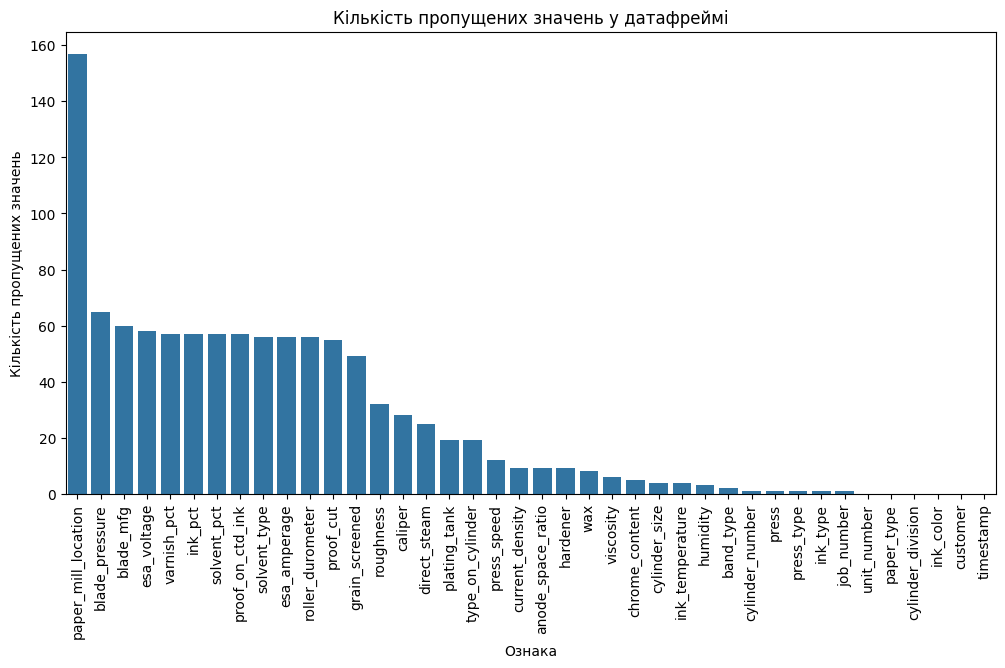

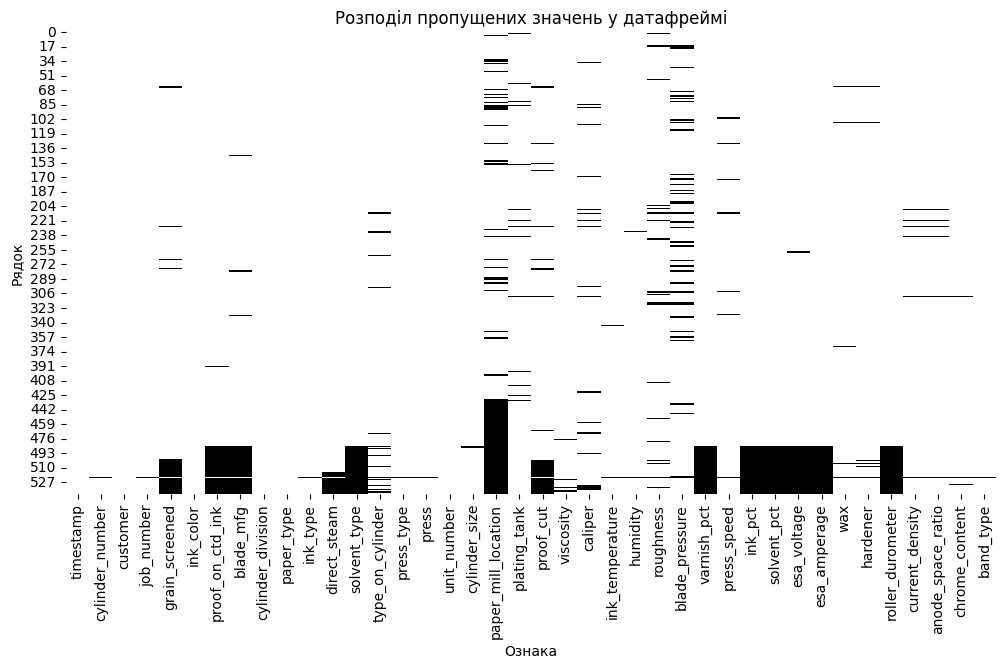

In [12]:
df = data_framer()
missing_values = df.isnull().sum()
sorted_missing = missing_values.sort_values(ascending=False)
print(sorted_missing)

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_missing.index, y=sorted_missing.values)
plt.xticks(rotation=90)
plt.title("Кількість пропущених значень у датафреймі")
plt.xlabel("Ознака")
plt.ylabel("Кількість пропущених значень")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='binary', cbar=False)
plt.title("Розподіл пропущених значень у датафреймі")
plt.xlabel("Ознака")
plt.ylabel("Рядок")
plt.show()